<a href="https://colab.research.google.com/github/Yiqing35/ESG-Investing/blob/main/ESG_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# !pip install seaborn==0.11.0
# !pip install plotly==4.12.0
import plotly.express as px

In [ ]:
def read_return_data():
    return_url='https://raw.githubusercontent.com/Yiqing35/ESG-Investing/main/HW2_Return_Data.csv'
    df_return=pd.read_csv(return_url)
    df_return.columns = [_.lstrip().rstrip() for _ in df_return.columns]
    return df_return

In [ ]:
def read_mkt_data():
    mkt_url='https://raw.githubusercontent.com/Yiqing35/ESG-Investing/main/HW2_Mkt_Data.csv'
    df_mkt=pd.read_csv(mkt_url)
    return df_mkt

In [ ]:
## Read in Return & Mkt Data
df_return = read_return_data()
df_mkt = read_mkt_data()
df_return['Date'] = pd.to_datetime(df_return['Date'])

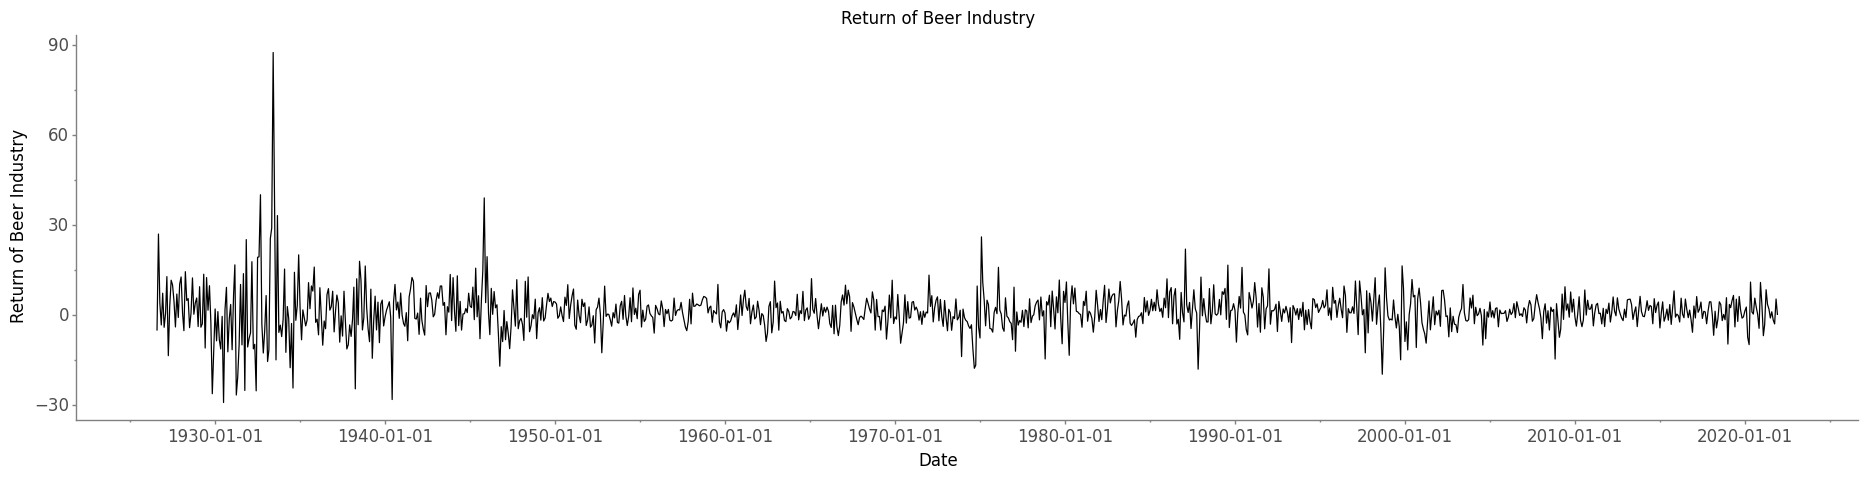

<ggplot: (8782522486497)>

In [ ]:
## Create Time Trend over return of Food Industry
plotnine.options.figure_size = (23, 5)
(
    ggplot(df_return, aes(x='Date', y='Beer'))
      + geom_line()
      #+ scale_y_continuous(breaks=y_ticks) # formats with scientific notation - probably better to change units
      + scale_x_date(breaks='10 year') # adds additional x axis breaks
      + xlab("Date") 
      + ylab("Return of Beer Industry") 
      + ggtitle("Return of Beer Industry") 
      + theme_classic() 
      + theme(axis_line=element_line(color="gray"), 
              axis_ticks=element_line(color = "gray"), 
              text=element_text(size = 12)) 
)

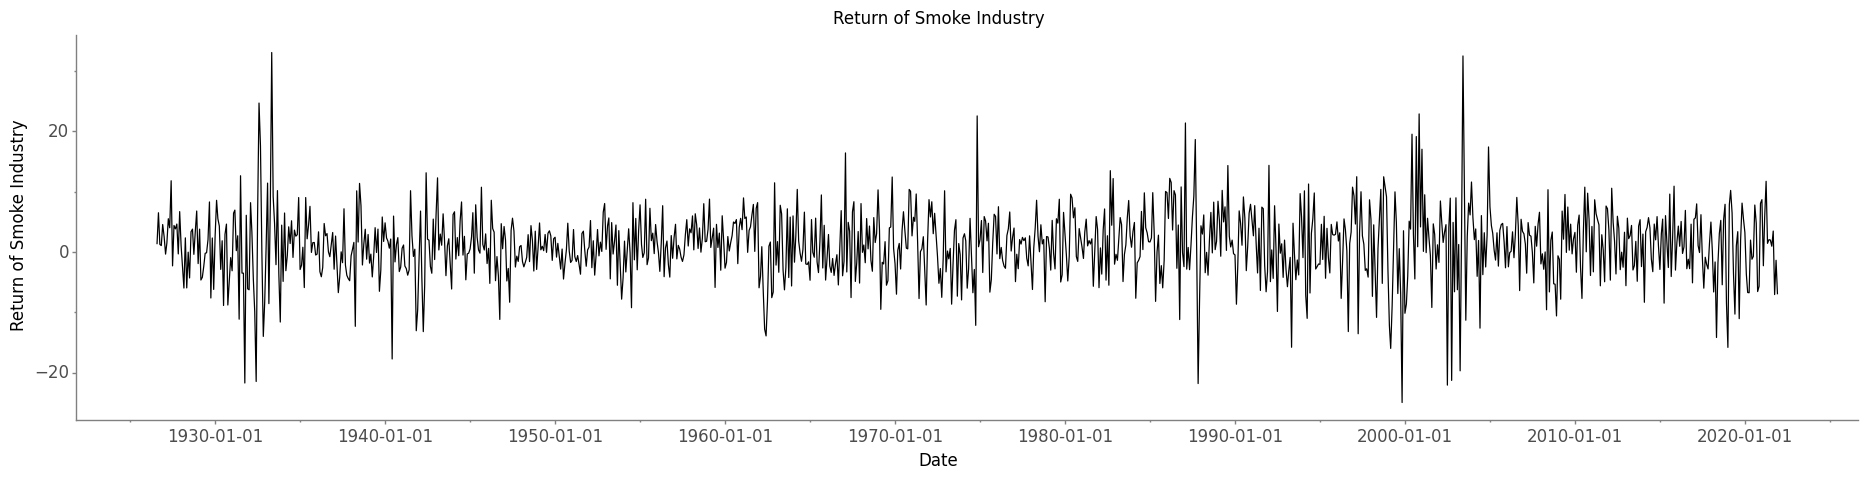

<ggplot: (8782522489673)>

In [ ]:
## Create Time Trend over return of Smoke Industry
plotnine.options.figure_size = (23, 5)
(
    ggplot(df_return, aes(x='Date', y='Smoke'))
      + geom_line()
      #+ scale_y_continuous(breaks=y_ticks) # formats with scientific notation - probably better to change units
      + scale_x_date(breaks='10 year') # adds additional x axis breaks
      + xlab("Date") 
      + ylab("Return of Smoke Industry") 
      + ggtitle("Return of Smoke Industry") 
      + theme_classic() 
      + theme(axis_line=element_line(color="gray"), 
              axis_ticks=element_line(color = "gray"), 
              text=element_text(size = 12)) 
)

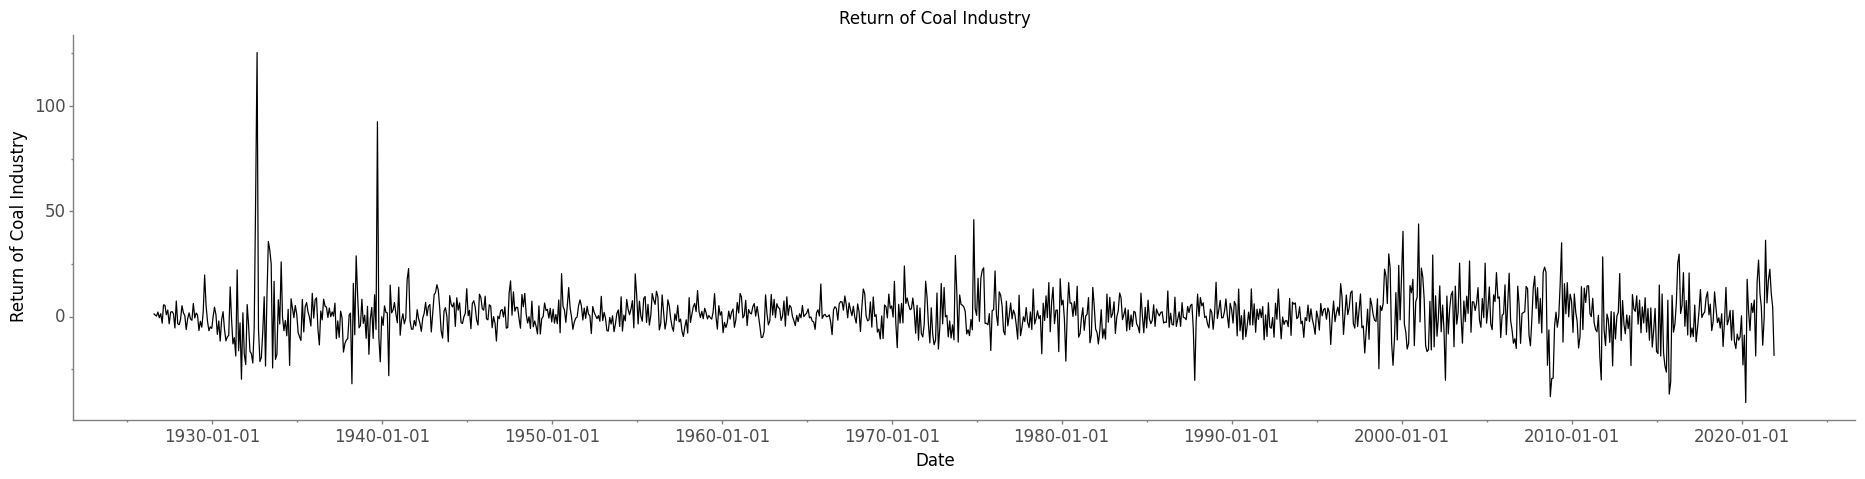

<ggplot: (8782520202757)>

In [ ]:
## Create Time Trend over return of Coal Industry
plotnine.options.figure_size = (23, 5)
(
    ggplot(df_return, aes(x='Date', y='Coal'))
      + geom_line()
      #+ scale_y_continuous(breaks=y_ticks) # formats with scientific notation - probably better to change units
      + scale_x_date(breaks='10 year') # adds additional x axis breaks
      + xlab("Date") 
      + ylab("Return of Coal Industry") 
      + ggtitle("Return of Coal Industry") 
      + theme_classic() 
      + theme(axis_line=element_line(color="gray"), 
              axis_ticks=element_line(color = "gray"), 
              text=element_text(size = 12)) 
)

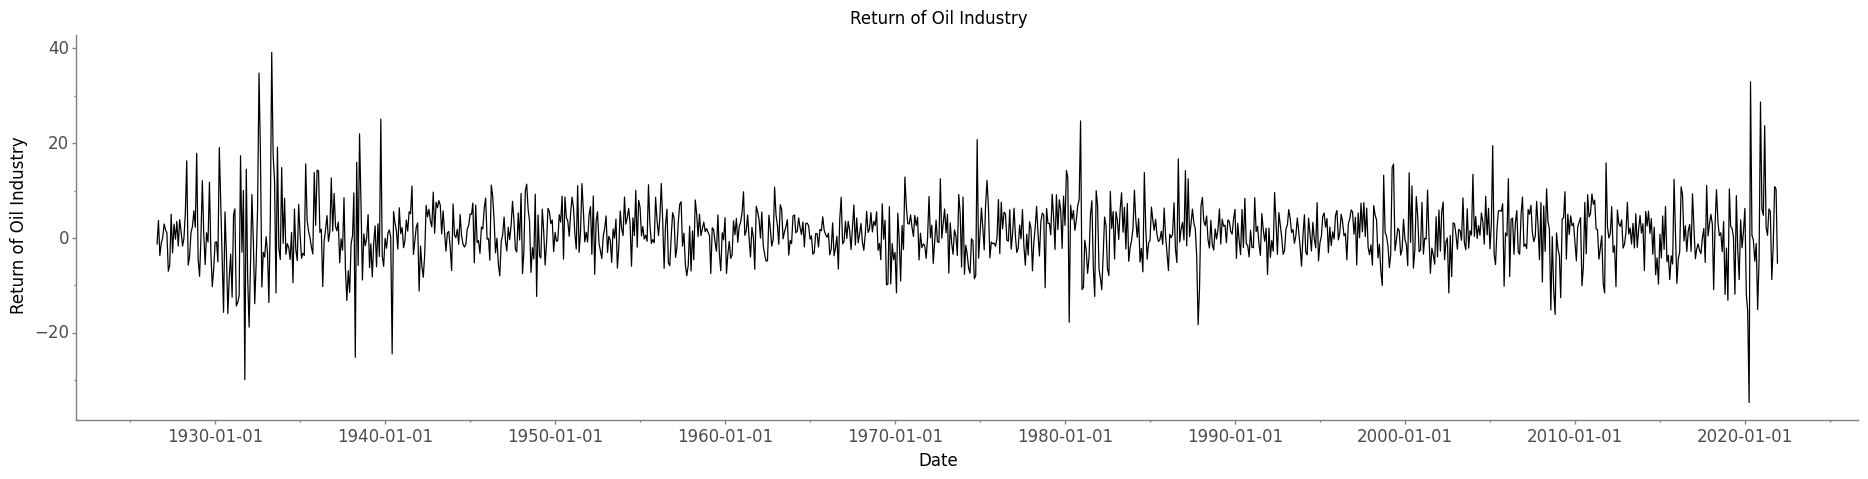

<ggplot: (8782520165257)>

In [ ]:
## Create Time Trend over return of Oil Industry
plotnine.options.figure_size = (23, 5)
(
    ggplot(df_return, aes(x='Date', y='Oil'))
      + geom_line()
      #+ scale_y_continuous(breaks=y_ticks) # formats with scientific notation - probably better to change units
      + scale_x_date(breaks='10 year') # adds additional x axis breaks
      + xlab("Date") 
      + ylab("Return of Oil Industry") 
      + ggtitle("Return of Oil Industry") 
      + theme_classic() 
      + theme(axis_line=element_line(color="gray"), 
              axis_ticks=element_line(color = "gray"), 
              text=element_text(size = 12)) 
)

## Q7 MVP

## We identify: 2 Beer, 3 Smoke, 18 Coal, 19 Oil as sin industries

In [ ]:
 !pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 4.9 MB/s 
     |████████████████████████████████| 2.7 MB 29.9 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

In [ ]:
#df_return['Date']=df_return['Date'].astype('int')

In [ ]:
df_return.index = df_return.Date
df_return = df_return.drop(['Date'],axis=1)
df_return_real = df_return / 100.0

In [ ]:
df_cum_return_real =  df_return_real.add(1).cumprod().subtract(1)

## Q7.A

In [ ]:
df_annuallized_return_real = df_return_real.add(1).prod() ** (12 / len(df_return_real)) - 1

In [ ]:
df_annualized_std_real = df_return_real.std() / (len(df_return_real) / np.sqrt(12))

In [ ]:
df_mkt = df_mkt.set_index("Date")

In [ ]:
df_mkt_real = df_mkt / 100.0

In [ ]:
df_annualized_mkt_return_real = df_mkt_real.add(1).prod() ** (12 / len(df_mkt_real)) - 1

In [ ]:
for col in df_annuallized_return_real.index:
    ar = df_annuallized_return_real[col]
    std = df_annualized_std_real[col]
    rf = df_annualized_mkt_return_real.loc['RF']
    sr = (ar-rf)/std
    print(f"Industry {col} | Annualized Return: {ar} | Annualized Standard Deviation: {std} | Sharpe Ratio: {sr}")

Industry Food | Annualized Return: 0.10669610071266544 | Annualized Standard Deviation: 0.0001427618926210897 | Sharpe Ratio: 519.0166862997089
Industry Beer | Annualized Return: 0.12094039083435382 | Annualized Standard Deviation: 0.00021549912372327375 | Sharpe Ratio: 409.93250011169556
Industry Smoke | Annualized Return: 0.12147801080093412 | Annualized Standard Deviation: 0.00017588652630390168 | Sharpe Ratio: 505.3128081725607
Industry Games | Annualized Return: 0.09615674219487258 | Annualized Standard Deviation: 0.00026862914616840257 | Sharpe Ratio: 236.5954954137281
Industry Books | Annualized Return: 0.08323375612685013 | Annualized Standard Deviation: 0.00021728236941707404 | Sharpe Ratio: 233.03068715651975
Industry Hshld | Annualized Return: 0.09663593508692858 | Annualized Standard Deviation: 0.00017422071799416092 | Sharpe Ratio: 367.55467173819227
Industry Clths | Annualized Return: 0.09869549783996856 | Annualized Standard Deviation: 0.0001856201644030897 | Sharpe Rati

In [ ]:
def get_efficient_frontier_and_plot(mu, S,plot=True): 
    ef = EfficientFrontier(mu, S)
    plot_ef = EfficientFrontier(mu, S, solver='ECOS') # TODO: Research different solver implications
    plot_ef.min_volatility()
    if plot:
        fig, ax = plt.subplots()
        plot_efficient_frontier(ef, ax=ax, show_assets=True)


        ret_tangent, std_tangent, _ = plot_ef.portfolio_performance()
        ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Vol")

        # Generate random portfolios
        n_samples = 10000
        w = np.random.dirichlet(np.ones(len(mu)), n_samples)
        rets = w.dot(mu)
        stds = np.sqrt(np.diag(w @ S @ w.T)) # X.T * SIGMA * X
        sharpes = rets / stds
        ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

        # Output
        ax.set_title("Efficient Frontier with random portfolios")
        ax.legend()
        plt.tight_layout()
        plt.show()
    return plot_ef

In [ ]:
mu_a = mean_historical_return(df_return_real, returns_data=True, frequency=12)
S_a = CovarianceShrinkage(df_return_real, returns_data=True,  frequency=12).ledoit_wolf()

/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1297: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


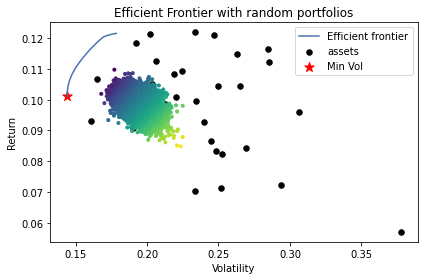

In [ ]:
ef_a = get_efficient_frontier_and_plot(mu_a, S_a)

## Q7.B

In [ ]:
SIN_INDUSTRIES = ['Beer', 'Smoke', 'Coal', 'Oil']

In [ ]:
df_return_real_without_sin = df_return_real.loc[:, ~df_return_real.columns.isin(SIN_INDUSTRIES)]

In [ ]:
mu_b = mean_historical_return(df_return_real_without_sin, returns_data=True, frequency=12)
S_b = CovarianceShrinkage(df_return_real_without_sin, returns_data=True,  frequency=12).ledoit_wolf()

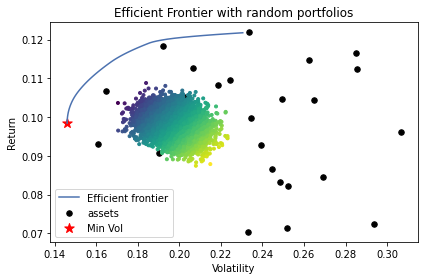

In [ ]:
ef_b = get_efficient_frontier_and_plot(mu_b, S_b)

In [ ]:
rf = df_annualized_mkt_return_real.loc['RF']
ef_a_ret, ef_a_vol, ef_a_sr = ef_a.portfolio_performance(risk_free_rate = rf)
ef_b_ret, ef_b_vol, ef_b_sr = ef_b.portfolio_performance(risk_free_rate = rf)

In [ ]:
# t-test
from scipy.stats import ttest_ind_from_stats
t_val, p_val = ttest_ind_from_stats(mean1=ef_a_ret, std1=ef_a_vol, nobs1=len(df_return_real_without_sin),
                     mean2=ef_b_ret,std2=ef_b_vol, nobs2=len(df_return_real_without_sin))
if p_val > 0.05:
    print("No statistically significant difference between the returns of all industry and all-but-sin industry")

No statistically significant difference between the returns of all industry and all-but-sin industry


## Q7.C

In [ ]:
def get_optimal_weights(df, plot=True):
    mu = mean_historical_return(df, returns_data=True, frequency=12)
    S = CovarianceShrinkage(df, returns_data=True,  frequency=12).ledoit_wolf()    
    ef = get_efficient_frontier_and_plot(mu, S, plot=plot)
    return mu, S, ef.weights

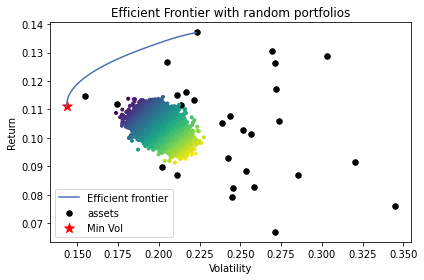

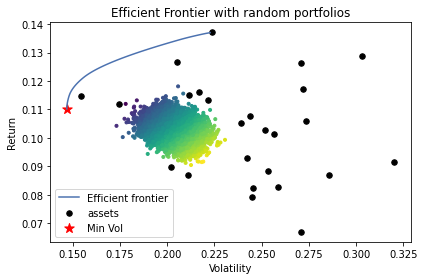

In [ ]:
# all industry
df_return_real_until_2000 = df_return_real[:'1999'].copy()
df_return_without_sin_until_2000 = df_return_real[:'1999'].copy().loc[:, ~df_return_real.columns.isin(SIN_INDUSTRIES)]
mu_until_2000_all_ind, S_until_2000_all_ind, weights_until_2000_all_ind = get_optimal_weights(df_return_real_until_2000)
mu_until_2000_without_sin, S_until_2000_without_sin, weights_until_2000_without_sin  = get_optimal_weights(df_return_without_sin_until_2000)

In [ ]:
from pypfopt.base_optimizer import portfolio_performance

In [ ]:
# all ind
ret_all_ind_1999, std_all_ind_1999, sr_all_ind_1999 = portfolio_performance(weights_until_2000_all_ind,mu_until_2000_all_ind, S_until_2000_all_ind )

In [ ]:
# without sin
ret_without_sin_1999, std_without_sin_1999, sr_without_sin_1999 = portfolio_performance(weights_until_2000_without_sin, mu_until_2000_without_sin, S_until_2000_without_sin,risk_free_rate=rf)

In [ ]:
t_val, p_val = ttest_ind_from_stats(mean1=ret_all_ind_1999, std1=std_all_ind_1999, nobs1=len(df_return_real_until_2000),
                     mean2=ret_without_sin_1999,std2=std_without_sin_1999, nobs2=len(df_return_real_without_sin))
if p_val > 0.05:
    print("No statistically significant difference between the returns of all industry and all-but-sin industry")

No statistically significant difference between the returns of all industry and all-but-sin industry


## Q7.d

In [ ]:
SIN_INDUSTRIES

['Beer', 'Smoke', 'Coal', 'Oil']

In [ ]:
sin_pos = []
for _ in SIN_INDUSTRIES:
    sin_pos.append(df_return_real.columns.tolist().index(_))

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def get_sin_weights(df):
    *_, weights = get_optimal_weights(df,plot=False)
    sin_weights = weights.take(sin_pos)
    return sin_weights

In [ ]:
sin_weight_dict = {_:[] for _ in SIN_INDUSTRIES}

In [ ]:
for i in tqdm(range(len(df_return_real)-20*12)):
    subset = df_return_real.iloc[i:i+20*12,:]
    beer, smoke, coal, oil = get_sin_weights(subset)
    sin_weight_dict['Beer'].append(beer)
    sin_weight_dict['Smoke'].append(smoke)
    sin_weight_dict['Coal'].append(coal)
    sin_weight_dict['Oil'].append(oil)

  0%|          | 0/905 [00:00<?, ?it/s]

In [ ]:
last_dates = [] 
for i in range(len(df_return_real)-20*12):
    last_ind = df_return_real.iloc[i:i+20*12,:].index[-1]
    last_dates.append(last_ind)

In [ ]:
sin_weight_df = pd.DataFrame(sin_weight_dict)

In [ ]:
sin_weight_df['Date'] = last_dates
sin_weight_df = sin_weight_df.set_index('Date')

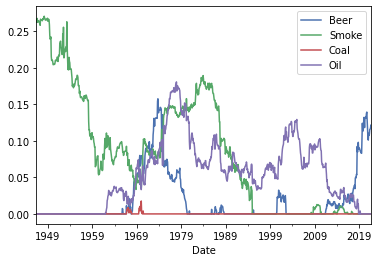

In [ ]:
sin_weight_df.plot()

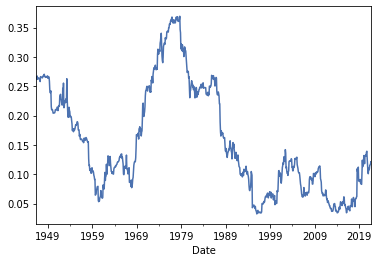

In [ ]:
sin_weight_df.apply(sum, axis=1).plot()